# Predicting California Housing Prices: A Machine Learning Regression Analysis

**Author:** Avdey Axonov  
**Course:** ITCS 3156 - Introduction to Machine Learning  
**Institution:** University of North Carolina at Charlotte  
**Date:** December 2025

---

## Project Overview

This notebook implements and compares two regression algorithms to predict California housing prices:
1. Linear Regression (baseline)
2. Neural Network (MLPRegressor)

**Dataset:** California Housing (sklearn built-in)  
**Samples:** 20,640  
**Features:** 8 (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)  
**Target:** Median House Value (in $100,000s)

---
## 1. Import Libraries and Setup

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.3f}'.format)

# Plotting settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✓ All libraries imported successfully!
NumPy version: 2.3.5
Pandas version: 2.3.3


---
## 2. Load and Explore Data

In [2]:
# Load California Housing dataset
housing = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Display basic information
print("="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Shape: {df.shape[0]} samples × {df.shape[1]} features")
print(f"\nFeatures: {list(housing.feature_names)}")
print(f"Target: MedHouseVal (Median House Value in $100,000s)")
print(f"\nDataset Description:\n{housing.DESCR[:500]}...")

# Display first few rows
print("\n" + "="*70)
print("FIRST 5 SAMPLES")
print("="*70)
df.head()

DATASET INFORMATION
Shape: 20640 samples × 9 features

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: MedHouseVal (Median House Value in $100,000s)

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...

FIRST 5 SAMPLES


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230,4.526
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220,3.585
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240,3.521
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250,3.413
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250,3.422


In [3]:
# Check data types and missing values
print("="*70)
print("DATA QUALITY CHECK")
print("="*70)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print("\n✓ No missing values found!")

DATA QUALITY CHECK

Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Total missing values: 0

✓ No missing values found!


In [4]:
# Statistical summary
print("="*70)
print("STATISTICAL SUMMARY")
print("="*70)
df.describe()

STATISTICAL SUMMARY


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


---
## 3. Data Visualization (Section 2.2)

### 3.1 Correlation Heatmap

✓ Saved: 1_correlation_heatmap.png


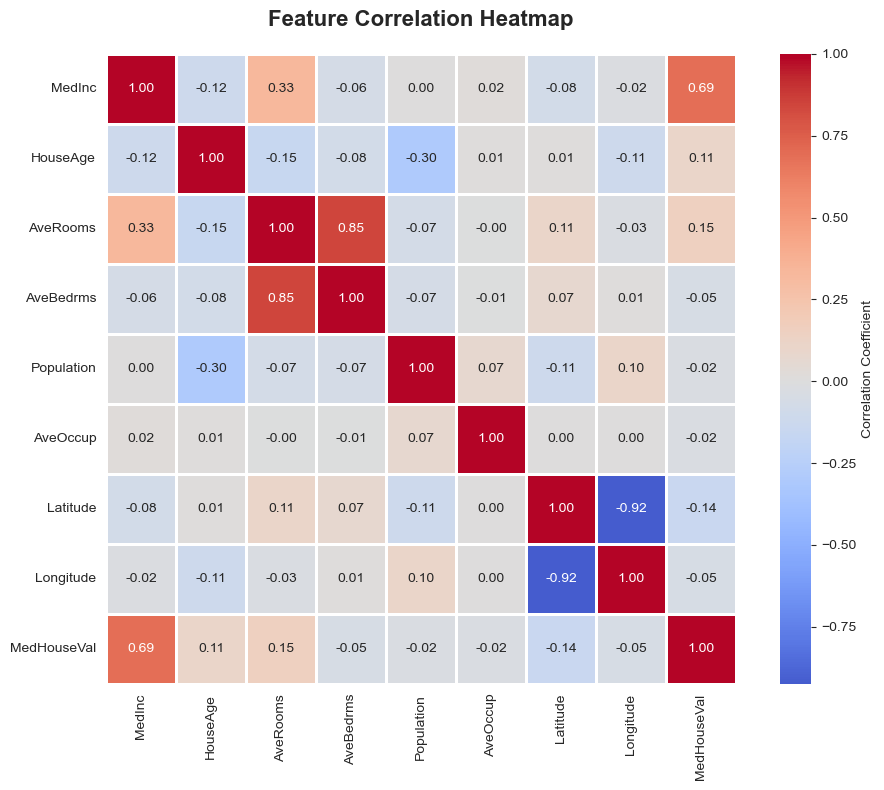


Correlation with MedHouseVal (sorted):
MedHouseVal    1.000
MedInc         0.688
AveRooms       0.152
HouseAge       0.106
AveOccup      -0.024
Population    -0.025
Longitude     -0.046
AveBedrms     -0.047
Latitude      -0.144
Name: MedHouseVal, dtype: float64


In [5]:
# Create correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f', 
            square=True, 
            linewidths=1, 
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('1_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 1_correlation_heatmap.png")
plt.show()

# Print correlation with target
print("\nCorrelation with MedHouseVal (sorted):")
print(df.corr()['MedHouseVal'].sort_values(ascending=False))

### 3.2 Feature Distribution Histograms

✓ Saved: 2_feature_distributions.png


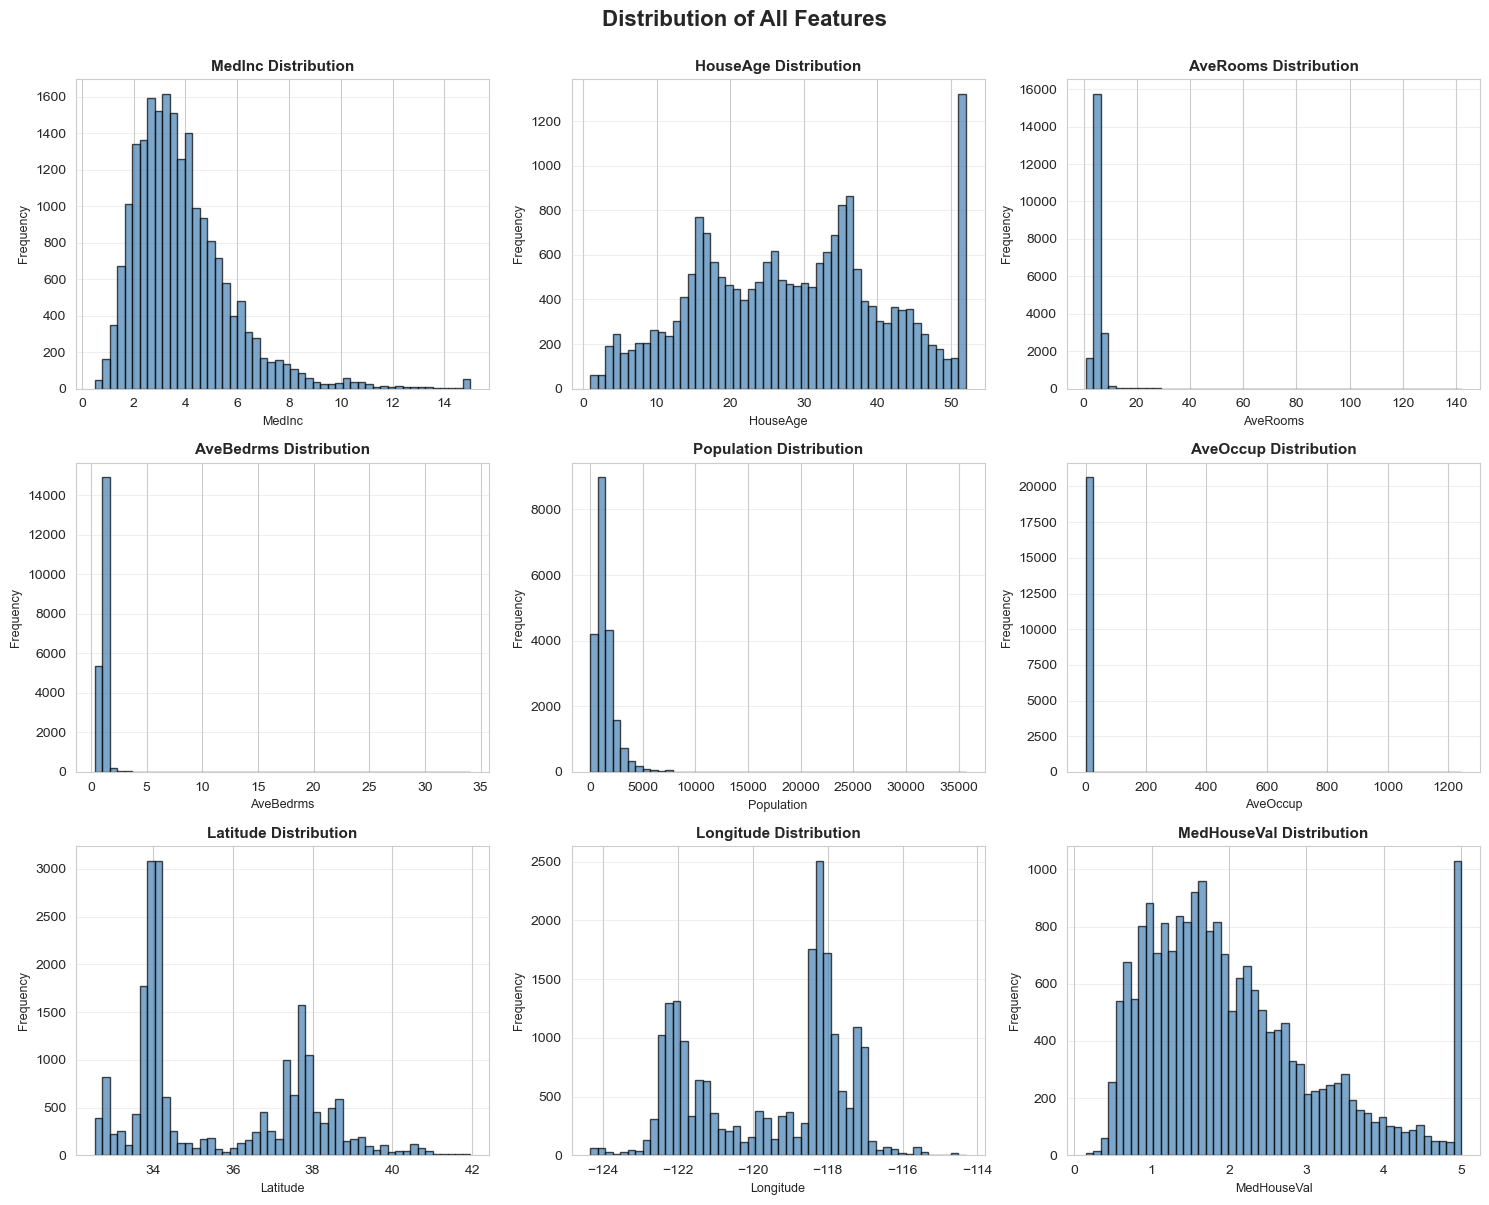

In [6]:
# Create 3x3 grid of histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, column in enumerate(df.columns):
    axes[idx].hist(df[column], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{column} Distribution', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel(column, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('2_feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 2_feature_distributions.png")
plt.show()

### 3.3 Median Income vs House Value Scatter Plot

✓ Saved: 3_income_vs_price.png


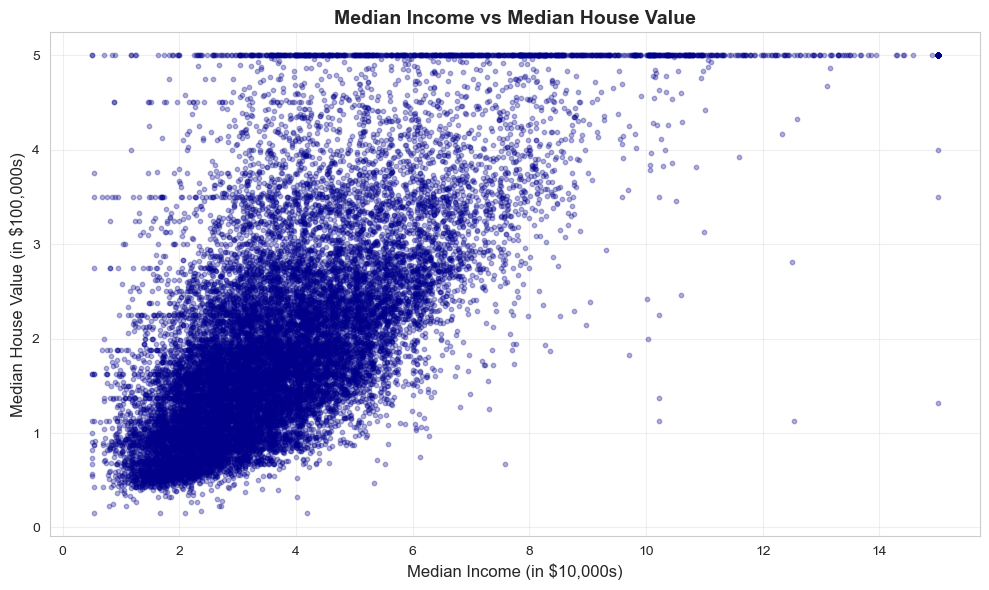

In [7]:
# Scatter plot: MedInc vs MedHouseVal
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3, c='darkblue', s=10)
plt.xlabel('Median Income (in $10,000s)', fontsize=12)
plt.ylabel('Median House Value (in $100,000s)', fontsize=12)
plt.title('Median Income vs Median House Value', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('3_income_vs_price.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 3_income_vs_price.png")
plt.show()

### 3.4 Geographic Distribution Map

✓ Saved: 4_geographic_distribution.png


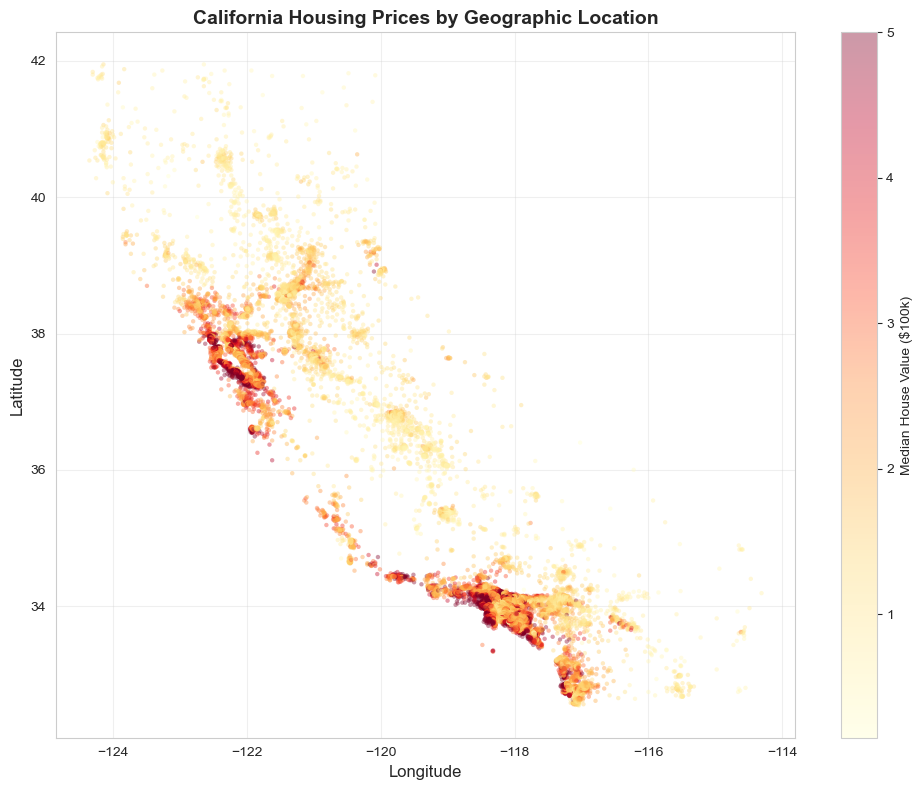

In [8]:
# Geographic scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], 
                     cmap='YlOrRd', 
                     s=10, 
                     alpha=0.4, 
                     edgecolors='none')

cbar = plt.colorbar(scatter, label='Median House Value ($100k)')
cbar.ax.tick_params(labelsize=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('California Housing Prices by Geographic Location', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('4_geographic_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 4_geographic_distribution.png")
plt.show()

---
## 4. Data Preprocessing (Section 2.4)

### 4.1 Train/Test Split

In [9]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("="*70)
print("TRAIN/TEST SPLIT")
print("="*70)
print(f"Original dataset: {X.shape[0]} samples")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")
print("\n✓ Data split complete!")

TRAIN/TEST SPLIT
Original dataset: 20640 samples
Training set: 16512 samples (80.0%)
Test set: 4128 samples (20.0%)
Number of features: 8

✓ Data split complete!


### 4.2 Feature Scaling (StandardScaler)

In [10]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for display
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("="*70)
print("FEATURE SCALING (StandardScaler)")
print("="*70)

print("\nBEFORE SCALING (first 5 training samples):")
print(X_train.head())

print("\nAFTER SCALING (first 5 training samples):")
print(X_train_scaled_df.head())

print("\nScaled Training Data Statistics:")
print("\nMean (should be ~0):")
print(X_train_scaled_df.mean())
print("\nStandard Deviation (should be ~1):")
print(X_train_scaled_df.std())

print("\n✓ Feature scaling complete!")

FEATURE SCALING (StandardScaler)

BEFORE SCALING (first 5 training samples):
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196   3.260    33.000     5.018      1.006    2300.000     3.692    32.710   
8267    3.812    49.000     4.474      1.041    1314.000     1.738    33.770   
17445   4.156     4.000     5.646      0.985     915.000     2.723    34.660   
14265   1.942    36.000     4.003      1.034    1418.000     3.994    32.690   
2271    3.554    43.000     6.268      1.134     874.000     2.300    36.780   

       Longitude  
14196   -117.030  
8267    -118.160  
17445   -120.480  
14265   -117.110  
2271    -119.800  

AFTER SCALING (first 5 training samples):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  -0.326     0.348    -0.175     -0.208       0.768     0.051    -1.373   
1  -0.036     1.618    -0.403     -0.129      -0.099    -0.117    -0.877   
2   0.145    -1.953     0.088     -0.258      -0.450    -

---
## 5. Model Training and Evaluation

### 5.1 Linear Regression

In [11]:
# Train Linear Regression
print("="*70)
print("LINEAR REGRESSION MODEL")
print("="*70)

start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_train_time = time.time() - start_time

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print(f"\nTraining time: {lr_train_time:.2f} seconds")
print("\nTraining Set Performance:")
print(f"  MSE:  {lr_train_mse:.3f}")
print(f"  RMSE: {lr_train_rmse:.3f}")
print(f"  MAE:  {lr_train_mae:.3f}")
print(f"  R²:   {lr_train_r2:.3f}")

print("\nTest Set Performance:")
print(f"  MSE:  {lr_test_mse:.3f}")
print(f"  RMSE: {lr_test_rmse:.3f}")
print(f"  MAE:  {lr_test_mae:.3f}")
print(f"  R²:   {lr_test_r2:.3f}")

print("\n✓ Linear Regression training complete!")

LINEAR REGRESSION MODEL

Training time: 0.01 seconds

Training Set Performance:
  MSE:  0.518
  RMSE: 0.720
  MAE:  0.529
  R²:   0.613

Test Set Performance:
  MSE:  0.556
  RMSE: 0.746
  MAE:  0.533
  R²:   0.576

✓ Linear Regression training complete!


### 5.2 Neural Network (MLPRegressor)

In [12]:
# Train Neural Network
print("="*70)
print("NEURAL NETWORK MODEL (MLPRegressor)")
print("="*70)

start_time = time.time()
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 100),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=False
)
nn_model.fit(X_train_scaled, y_train)
nn_train_time = time.time() - start_time

# Make predictions
nn_train_pred = nn_model.predict(X_train_scaled)
nn_test_pred = nn_model.predict(X_test_scaled)

# Calculate metrics
nn_train_mse = mean_squared_error(y_train, nn_train_pred)
nn_test_mse = mean_squared_error(y_test, nn_test_pred)
nn_train_rmse = np.sqrt(nn_train_mse)
nn_test_rmse = np.sqrt(nn_test_mse)
nn_train_mae = mean_absolute_error(y_train, nn_train_pred)
nn_test_mae = mean_absolute_error(y_test, nn_test_pred)
nn_train_r2 = r2_score(y_train, nn_train_pred)
nn_test_r2 = r2_score(y_test, nn_test_pred)

print(f"\nArchitecture: {nn_model.hidden_layer_sizes}")
print(f"Training time: {nn_train_time:.2f} seconds")
print(f"Iterations: {nn_model.n_iter_}")

print("\nTraining Set Performance:")
print(f"  MSE:  {nn_train_mse:.3f}")
print(f"  RMSE: {nn_train_rmse:.3f}")
print(f"  MAE:  {nn_train_mae:.3f}")
print(f"  R²:   {nn_train_r2:.3f}")

print("\nTest Set Performance:")
print(f"  MSE:  {nn_test_mse:.3f}")
print(f"  RMSE: {nn_test_rmse:.3f}")
print(f"  MAE:  {nn_test_mae:.3f}")
print(f"  R²:   {nn_test_r2:.3f}")

print("\n✓ Neural Network training complete!")

NEURAL NETWORK MODEL (MLPRegressor)

Architecture: (100, 100)
Training time: 33.38 seconds
Iterations: 270

Training Set Performance:
  MSE:  0.167
  RMSE: 0.409
  MAE:  0.281
  R²:   0.875

Test Set Performance:
  MSE:  0.271
  RMSE: 0.520
  MAE:  0.342
  R²:   0.793

✓ Neural Network training complete!


### 5.3 Model Comparison

In [13]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Neural Network'],
    'MSE': [lr_test_mse, nn_test_mse],
    'RMSE': [lr_test_rmse, nn_test_rmse],
    'MAE': [lr_test_mae, nn_test_mae],
    'R²': [lr_test_r2, nn_test_r2],
    'Training Time (s)': [lr_train_time, nn_train_time]
})

print("="*70)
print("MODEL COMPARISON (Test Set Performance)")
print("="*70)
print(comparison_df.to_string(index=False))

# Calculate improvements
mse_improvement = ((lr_test_mse - nn_test_mse) / lr_test_mse) * 100
r2_improvement = ((nn_test_r2 - lr_test_r2) / lr_test_r2) * 100

print("\n" + "="*70)
print("NEURAL NETWORK IMPROVEMENTS")
print("="*70)
print(f"MSE reduction: {mse_improvement:.1f}%")
print(f"R² improvement: {r2_improvement:.1f}%")
print(f"RMSE reduction: ${(lr_test_rmse - nn_test_rmse)*100:.0f}k per prediction")

MODEL COMPARISON (Test Set Performance)
            Model   MSE  RMSE   MAE    R²  Training Time (s)
Linear Regression 0.556 0.746 0.533 0.576              0.008
   Neural Network 0.271 0.520 0.342 0.793             33.376

NEURAL NETWORK IMPROVEMENTS
MSE reduction: 51.3%
R² improvement: 37.8%
RMSE reduction: $23k per prediction


### 5.4 Actual vs Predicted Plots

✓ Saved: actual_vs_predicted.png


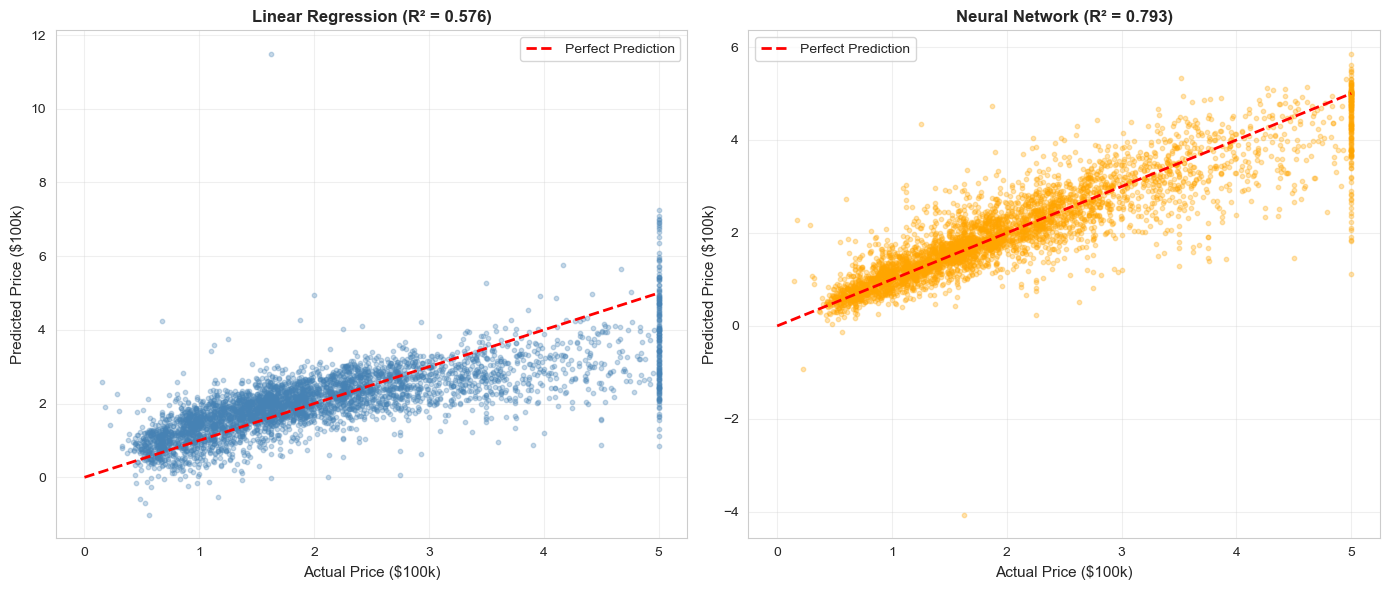

In [14]:
# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear Regression
axes[0].scatter(y_test, lr_test_pred, alpha=0.3, s=10, color='steelblue')
axes[0].plot([0, 5], [0, 5], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($100k)', fontsize=11)
axes[0].set_ylabel('Predicted Price ($100k)', fontsize=11)
axes[0].set_title(f'Linear Regression (R² = {lr_test_r2:.3f})', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Neural Network
axes[1].scatter(y_test, nn_test_pred, alpha=0.3, s=10, color='orange')
axes[1].plot([0, 5], [0, 5], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($100k)', fontsize=11)
axes[1].set_ylabel('Predicted Price ($100k)', fontsize=11)
axes[1].set_title(f'Neural Network (R² = {nn_test_r2:.3f})', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("✓ Saved: actual_vs_predicted.png")
plt.show()

### 5.5 Residual Plots

✓ Saved: residual_plots.png


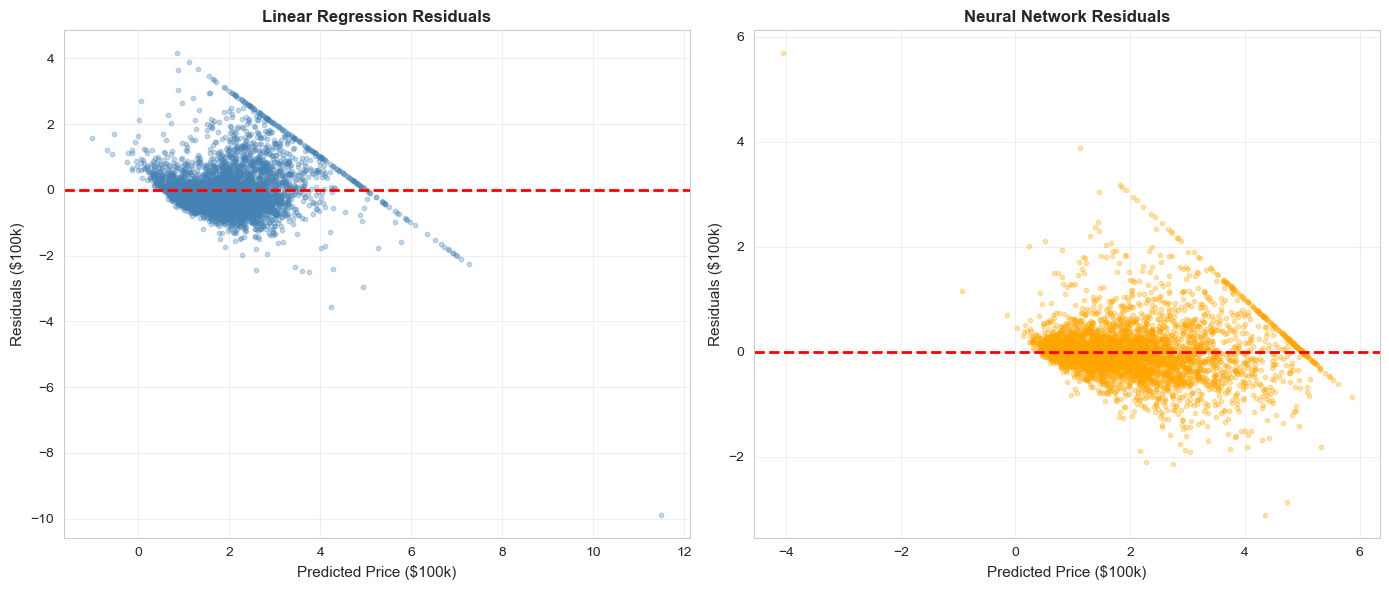

In [15]:
# Calculate residuals
lr_residuals = y_test - lr_test_pred
nn_residuals = y_test - nn_test_pred

# Plot residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear Regression residuals
axes[0].scatter(lr_test_pred, lr_residuals, alpha=0.3, s=10, color='steelblue')
axes[0].axhline(0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Price ($100k)', fontsize=11)
axes[0].set_ylabel('Residuals ($100k)', fontsize=11)
axes[0].set_title('Linear Regression Residuals', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Neural Network residuals
axes[1].scatter(nn_test_pred, nn_residuals, alpha=0.3, s=10, color='orange')
axes[1].axhline(0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price ($100k)', fontsize=11)
axes[1].set_ylabel('Residuals ($100k)', fontsize=11)
axes[1].set_title('Neural Network Residuals', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
print("✓ Saved: residual_plots.png")
plt.show()

---
## 6. Experiments (Section 4.4)

### Experiment 1: Learning Curves

EXPERIMENT 1: LEARNING CURVES
Computing learning curves (this may take 2-3 minutes)...

Learning Curve Results:
----------------------------------------------------------------------
Training Size   Train R²        Validation R²   Gap       
----------------------------------------------------------------------
1320            0.899           0.648           0.251     
2641            0.890           0.634           0.257     
3962            0.874           0.756           0.118     
5283            0.875           0.759           0.115     
6604            0.834           0.781           0.053     
7925            0.864           0.777           0.087     
9246            0.874           0.786           0.088     
10567           0.873           0.784           0.088     
11888           0.868           0.788           0.080     
13209           0.852           0.795           0.057     

✓ Final Training R²: 0.852 ± 0.007
✓ Final Validation R²: 0.795 ± 0.004
✓ Saved: experiment1_lea

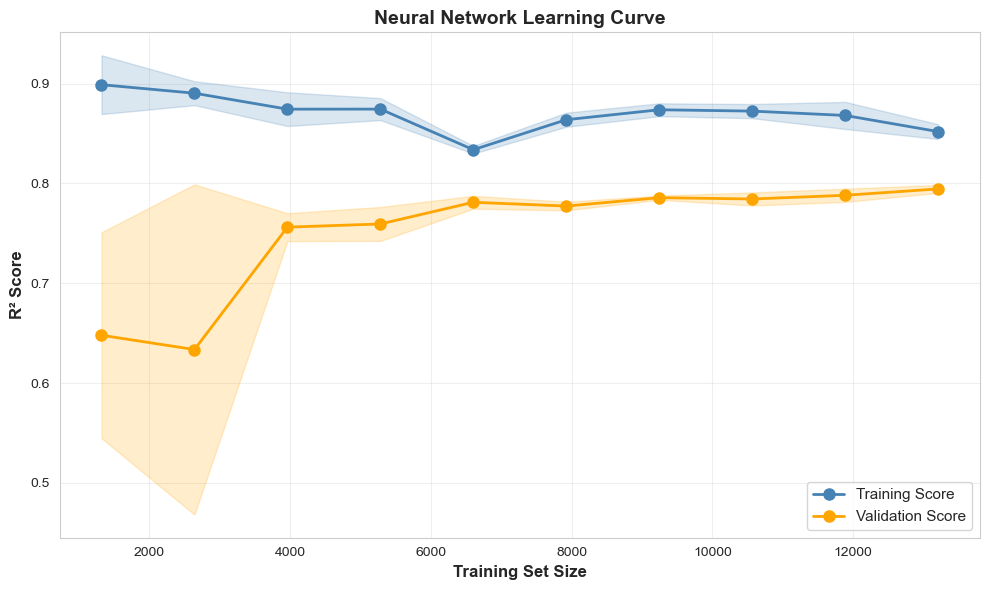

In [16]:
print("="*70)
print("EXPERIMENT 1: LEARNING CURVES")
print("="*70)
print("Computing learning curves (this may take 2-3 minutes)...\n")

train_sizes, train_scores, val_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42),
    X_train_scaled, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

print("Learning Curve Results:")
print("-" * 70)
print(f"{'Training Size':<15} {'Train R²':<15} {'Validation R²':<15} {'Gap':<10}")
print("-" * 70)
for size, train_r2, val_r2 in zip(train_sizes, train_mean, val_mean):
    gap = train_r2 - val_r2
    print(f"{int(size):<15} {train_r2:<15.3f} {val_r2:<15.3f} {gap:<10.3f}")

print(f"\n✓ Final Training R²: {train_mean[-1]:.3f} ± {train_std[-1]:.3f}")
print(f"✓ Final Validation R²: {val_mean[-1]:.3f} ± {val_std[-1]:.3f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='steelblue', linewidth=2, 
         markersize=8, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color='steelblue')
plt.plot(train_sizes, val_mean, 'o-', color='orange', linewidth=2, 
         markersize=8, label='Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.2, color='orange')
plt.xlabel('Training Set Size', fontsize=12, fontweight='bold')
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.title('Neural Network Learning Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('experiment1_learning_curve.png', dpi=300, bbox_inches='tight')
print("✓ Saved: experiment1_learning_curve.png")
plt.show()

### Experiment 2: Hyperparameter Tuning

In [ ]:
print("="*70)
print("EXPERIMENT 2: HYPERPARAMETER TUNING (HIDDEN LAYER SIZES)")
print("="*70)

layer_configs = [
    (50,),
    (100,),
    (100, 50),
    (100, 100),
    (200, 100),
    (150, 150)
]

results = []
print("\nTesting different architectures...")
print("-" * 70)
print(f"{'Architecture':<20} {'Train R²':<12} {'Test R²':<12} {'Training Time':<15}")
print("-" * 70)

for layers in layer_configs:
    start_time = time.time()
    model = MLPRegressor(
        hidden_layer_sizes=layers,
        max_iter=500,
        random_state=42,
        verbose=False
    )
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    train_r2 = r2_score(y_train, model.predict(X_train_scaled))
    test_r2 = r2_score(y_test, model.predict(X_test_scaled))
    
    results.append({
        'Architecture': str(layers),
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Time': train_time
    })
    
    print(f"{str(layers):<20} {train_r2:<12.3f} {test_r2:<12.3f} {train_time:<15.2f}s")

results_df = pd.DataFrame(results)
best_idx = results_df['Test_R2'].idxmax()
print("-" * 70)
print(f"\n✓ Best Architecture: {results_df.loc[best_idx, 'Architecture']}")
print(f"  Test R²: {results_df.loc[best_idx, 'Test_R2']:.3f}")
print(f"  Overfitting Gap: {results_df.loc[best_idx, 'Train_R2'] - results_df.loc[best_idx, 'Test_R2']:.3f}")

# Plot results
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(results_df))
width = 0.35

plt.bar(x_pos - width/2, results_df['Train_R2'], width, 
        label='Train R²', color='steelblue', alpha=0.8)
plt.bar(x_pos + width/2, results_df['Test_R2'], width, 
        label='Test R²', color='orange', alpha=0.8)

plt.xlabel('Architecture', fontsize=12, fontweight='bold')
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.title('Neural Network Performance by Architecture', fontsize=14, fontweight='bold')
plt.xticks(x_pos, results_df['Architecture'], rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('experiment2_hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
print("✓ Saved: experiment2_hyperparameter_tuning.png")
plt.show()

EXPERIMENT 2: HYPERPARAMETER TUNING (HIDDEN LAYER SIZES)

Testing different architectures...
----------------------------------------------------------------------
Architecture         Train R²     Test R²      Training Time  
----------------------------------------------------------------------
(50,)                0.791        0.771        9.39           s
(100,)               0.799        0.777        11.80          s
(100, 50)            0.848        0.793        21.46          s
(100, 100)           0.875        0.793        35.50          s


### Experiment 3: Feature Importance

EXPERIMENT 3: FEATURE IMPORTANCE (LINEAR REGRESSION COEFFICIENTS)

Feature Importance (sorted by absolute coefficient):
----------------------------------------------------------------------
Feature         Coefficient     Interpretation
----------------------------------------------------------------------
Latitude                -0.897  1 SD ↑ latitude → $89.7k ↓ price
Longitude               -0.870  1 SD ↑ longitude → $87.0k ↓ price
MedInc                   0.854  1 SD ↑ medinc → $85.4k ↑ price
AveBedrms                0.339  1 SD ↑ avebedrms → $33.9k ↑ price
AveRooms                -0.294  1 SD ↑ averooms → $29.4k ↓ price
HouseAge                 0.123  1 SD ↑ houseage → $12.3k ↑ price
AveOccup                -0.041  1 SD ↑ aveoccup → $4.1k ↓ price
Population              -0.002  1 SD ↑ population → $0.2k ↓ price

Intercept: 2.072

✓ Saved: experiment3_feature_importance.png


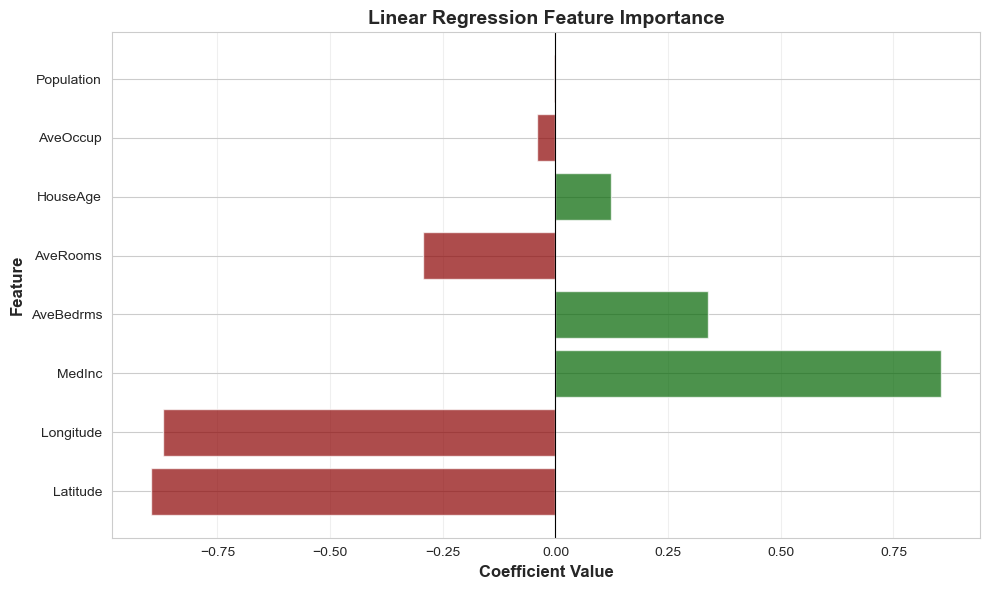

In [21]:
print("="*70)
print("EXPERIMENT 3: FEATURE IMPORTANCE (LINEAR REGRESSION COEFFICIENTS)")
print("="*70)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (sorted by absolute coefficient):")
print("-" * 70)
print(f"{'Feature':<15} {'Coefficient':<15} {'Interpretation'}")
print("-" * 70)

interpretations = {
    'MedInc': '1 SD ↑ income → price change',
    'Latitude': '1 SD ↑ north → price change',
    'Longitude': '1 SD ↑ east → price change',
    'AveRooms': '1 SD ↑ rooms → price change',
    'HouseAge': '1 SD ↑ age → price change',
    'AveBedrms': '1 SD ↑ bedrooms → price change',
    'Population': '1 SD ↑ population → price change',
    'AveOccup': '1 SD ↑ occupancy → price change'
}

for _, row in feature_importance.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    interp = f"1 SD ↑ {feature.lower()} → ${abs(coef)*100:.1f}k {'↑' if coef > 0 else '↓'} price"
    print(f"{feature:<15} {coef:>14.3f}  {interp}")

print(f"\nIntercept: {lr_model.intercept_:.3f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
colors = ['darkgreen' if c > 0 else 'darkred' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Linear Regression Feature Importance', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('experiment3_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: experiment3_feature_importance.png")
plt.show()

### Experiment 4: Cross-Validation

In [ ]:
print("="*70)
print("EXPERIMENT 4: 5-FOLD CROSS-VALIDATION")
print("="*70)
print("Running 5-fold cross-validation (this may take 1-2 minutes)...\n")

# Linear Regression CV
lr_cv_scores = cross_val_score(
    LinearRegression(),
    X_train_scaled, y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Neural Network CV
nn_cv_scores = cross_val_score(
    MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42),
    X_train_scaled, y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Cross-Validation Results (5 folds):")
print("-" * 70)
print(f"{'Model':<25} {'Mean R²':<12} {'Std Dev':<12} {'Min R²':<12} {'Max R²':<12}")
print("-" * 70)
print(f"{'Linear Regression':<25} {lr_cv_scores.mean():<12.3f} {lr_cv_scores.std():<12.3f} "
      f"{lr_cv_scores.min():<12.3f} {lr_cv_scores.max():<12.3f}")
print(f"{'Neural Network':<25} {nn_cv_scores.mean():<12.3f} {nn_cv_scores.std():<12.3f} "
      f"{nn_cv_scores.min():<12.3f} {nn_cv_scores.max():<12.3f}")

improvement = ((nn_cv_scores.mean() - lr_cv_scores.mean()) / lr_cv_scores.mean()) * 100
print("-" * 70)
print(f"\n✓ Neural Network shows {improvement:.1f}% improvement over Linear Regression")

# Plot CV results
plt.figure(figsize=(10, 6))
models = ['Linear\nRegression', 'Neural\nNetwork']
cv_means = [lr_cv_scores.mean(), nn_cv_scores.mean()]
cv_stds = [lr_cv_scores.std(), nn_cv_scores.std()]

bars = plt.bar(models, cv_means, yerr=cv_stds, capsize=10, 
               color=['steelblue', 'orange'], alpha=0.7, edgecolor='black', linewidth=1.5)
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.ylim(0, 0.9)
plt.grid(axis='y', alpha=0.3)

for i, (bar, mean, std) in enumerate(zip(bars, cv_means, cv_stds)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{mean:.3f}\n±{std:.3f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('experiment4_cross_validation.png', dpi=300, bbox_inches='tight')
print("✓ Saved: experiment4_cross_validation.png")
plt.show()

---
## 7. Final Summary

In [ ]:
print("="*70)
print("PROJECT SUMMARY")
print("="*70)

print("\n📊 DATASET:")
print(f"  Total samples: {len(df)}")
print(f"  Features: {X.shape[1]}")
print(f"  Training set: {len(X_train)} samples")
print(f"  Test set: {len(X_test)} samples")

print("\n🤖 MODELS TRAINED:")
print("  1. Linear Regression")
print("  2. Neural Network (100, 100)")

print("\n📈 BEST MODEL: Neural Network")
print(f"  Test R²: {nn_test_r2:.3f}")
print(f"  Test RMSE: ${nn_test_rmse*100:.1f}k")
print(f"  Test MAE: ${nn_test_mae*100:.1f}k")
print(f"  Improvement over Linear Regression: {r2_improvement:.1f}%")

print("\n🔬 EXPERIMENTS COMPLETED:")
print("  ✓ Learning Curves")
print("  ✓ Hyperparameter Tuning (6 architectures tested)")
print("  ✓ Feature Importance Analysis")
print("  ✓ 5-Fold Cross-Validation")

print("\n📁 FILES GENERATED:")
generated_files = [
    '1_correlation_heatmap.png',
    '2_feature_distributions.png',
    '3_income_vs_price.png',
    '4_geographic_distribution.png',
    'actual_vs_predicted.png',
    'residual_plots.png',
    'experiment1_learning_curve.png',
    'experiment2_hyperparameter_tuning.png',
    'experiment3_feature_importance.png',
    'experiment4_cross_validation.png'
]
for i, file in enumerate(generated_files, 1):
    print(f"  {i:2d}. {file}")

print("\n" + "="*70)
print("✅ PROJECT COMPLETE!")
print("="*70)